In [9]:
from os import listdir
ages = listdir('face_age')

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
# Параметры
base_dir = 'face_age'  # путь к данным
img_height = 200
img_width = 200
batch_size = 32

# Тренировочный датасет
train_datagen = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    image_size=(img_height, img_width),
    subset='training',
    validation_split=0.2,
    seed=123,
    batch_size=batch_size
)

# Валидационный датасет
validation_datagen = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    image_size=(img_height, img_width),
    subset='validation',
    validation_split=0.2,
    seed=123,
    batch_size=batch_size
)

Found 9772 files belonging to 12 classes.
Using 7818 files for training.
Found 9772 files belonging to 12 classes.
Using 1954 files for validation.


In [12]:
model = Sequential([    
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 2, 2, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,773,441 (10.58 MB)

 Trainable params: 2,770,369 (10.57 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [15]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae', 'mse', 'accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_mse',        # отслеживаем val_mse
    patience=7,               # ждем 7 эпохи без улучшения
    mode='min',               # минимизируем val_mse
    restore_best_weights=True # восстанавливаем лучшие веса после остановки
)

In [17]:
history = model.fit(
    train_datagen,
    epochs=100,
    validation_data=validation_datagen,
    callbacks=[early_stopping]
)

Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 46s 168ms/step - accuracy: 0.2479 - loss: 20.3078 - mae: 3.6239 - mse: 20.3078 - val_accuracy: 0.0957 - val_loss: 18.6013 - val_mae: 3.2814 - val_mse: 18.6013
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 40s 162ms/step - accuracy: 0.2656 - loss: 13.2030 - mae: 3.0059 - mse: 13.2030 - val_accuracy: 0.2416 - val_loss: 16.5357 - val_mae: 3.0466 - val_mse: 16.5357
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 40s 165ms/step - accuracy: 0.2692 - loss: 8.6535 - mae: 2.3886 - mse: 8.6535 - val_accuracy: 0.2528 - val_loss: 7.3371 - val_mae: 2.0745 - val_mse: 7.3371
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 39s 160ms/step - accuracy: 0.2579 - loss: 5.8336 - mae: 1.8889 - mse: 5.8336 - val_accuracy: 0.2559 - val_loss: 9.6024 - val_mae: 2.4041 - val_mse: 9.6024
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.2372 - loss: 4.0934 - mae: 1.5581 - mse: 4.0934 - val_accuracy: 0.2625 - val_loss: 12.8976 - val_mae: 2.7237 - val_mse: 12.8976
Epoch 6/10

In [30]:
min(history.history['val_mae'])

1.1430734395980835

In [18]:
model.save('model.keras')

In [21]:
import matplotlib.pyplot as plt
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


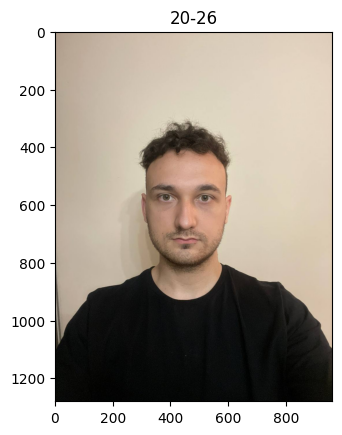

In [89]:
# загрузка входного изображения
image_path = 'face.jpg'
source_img = tf.keras.utils.load_img(image_path, target_size=(200, 200))

# преобразование изображения для передачи модели
img = tf.keras.utils.img_to_array(source_img)
img = np.expand_dims(img, axis=0)

# применение модели к изображению
# (дважды нулевой индекс, так как
#  модель возвращает список из списка)
model_prediction = model.predict(img)[0][0]

# поиск индекса возрастной группы
idx = round(model_prediction)

# определение возрастной группы
group = ages[idx]

# так как в названии группы
# присутствует индекс и точка с пробелом,
# убираем их для более
# красивого вывода
space_idx = group.find(' ')
pretty_group = group[space_idx+1:]

import matplotlib.image as img
plt.title(pretty_group)
plt.imshow(img.imread('source.jpg'))
plt.savefig('res2.jpg')

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np

In [35]:
import cv2

In [85]:
img = cv2.imread('source.jpg')

# перевод в черно-белое изображение
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# распознавание лица
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# запись в файл изображения лица 
for (x, y, w, h) in faces:
    faces = img[y:y + h, x:x + w]
    cv2.imwrite('face.jpg', faces)